In [9]:
import tushare as ts
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
import seaborn as sns
sns.set()

In [10]:
data=ts.get_k_data('hs300','2000-01-01','2017-06-30')
data.set_index('date',inplace=True)
data.index=pd.to_datetime(data.index)
data.head()

timed out


,open,close,high,low,volume,code
date,,,,,,
2005-04-08,984.66,1003.45,1003.70,979.53,14762500.0,hs300
2005-04-11,1003.88,995.42,1008.73,992.77,15936100.0,hs300
2005-04-12,993.71,978.70,993.71,978.20,10226200.0,hs300
2005-04-13,987.95,1000.90,1006.50,987.95,16071700.0,hs300
2005-04-14,1004.64,986.97,1006.42,985.58,12945700.0,hs300


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2973 entries, 2005-04-08 to 2017-06-30
Data columns (total 6 columns):
open      2973 non-null float64
close     2973 non-null float64
high      2973 non-null float64
low       2973 non-null float64
volume    2973 non-null float64
code      2973 non-null object
dtypes: float64(5), object(1)
memory usage: 162.6+ KB


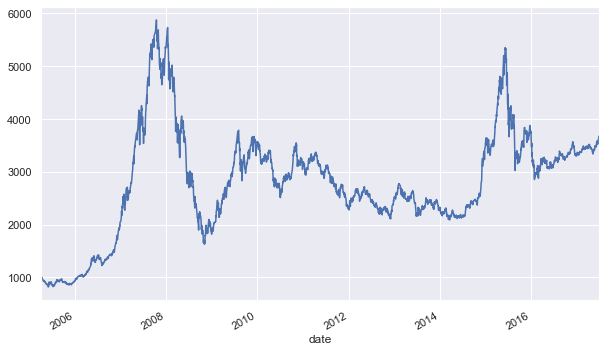

In [12]:
data['close'].plot(figsize=(10,6),grid=True)

## 特征工程处理

In [4]:
for i in range(1,21):
    data['close-'+str(i)+'d']=data['close'].shift(i)
data.head(30)

,open,close,high,low,volume,code,close-1d,close-2d,close-3d,close-4d,...,close-11d,close-12d,close-13d,close-14d,close-15d,close-16d,close-17d,close-18d,close-19d,close-20d
date,,,,,,,,,,,,,,,,,,,,,
2005-04-08,984.66,1003.45,1003.70,979.53,14762500.0,hs300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-11,1003.88,995.42,1008.73,992.77,15936100.0,hs300,1003.45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-12,993.71,978.70,993.71,978.20,10226200.0,hs300,995.42,1003.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-13,987.95,1000.90,1006.50,987.95,16071700.0,hs300,978.70,995.42,1003.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-14,1004.64,986.97,1006.42,985.58,12945700.0,hs300,1000.90,978.70,995.42,1003.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-15,982.61,974.08,982.61,971.93,10409000.0,hs300,986.97,1000.90,978.70,995.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-18,970.91,963.77,970.91,958.65,8598400.0,hs300,974.08,986.97,1000.90,978.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-19,962.92,965.89,968.87,957.91,9212620.0,hs300,963.77,974.08,986.97,1000.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-20,964.15,950.87,964.15,946.20,8850700.0,hs300,965.89,963.77,974.08,986.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
hs_20d=data[[x for x in data.columns if 'close' in x]].iloc[20:]
hs_20d=hs_20d.iloc[:,::-1]
hs_20d.head()

,close-20d,close-19d,close-18d,close-17d,close-16d,close-15d,close-14d,close-13d,close-12d,close-11d,...,close-9d,close-8d,close-7d,close-6d,close-5d,close-4d,close-3d,close-2d,close-1d,close
date,,,,,,,,,,,,,,,,,,,,,
2005-05-13,1003.45,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,...,930.07,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54
2005-05-16,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,...,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27
2005-05-17,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,...,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46
2005-05-18,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,...,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20
2005-05-19,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,926.60,...,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20,884.17


## 测试集

In [6]:
clf=svm.SVR(kernel='linear')
features_train=hs_20d[:2000]
features_train.head()

,close-20d,close-19d,close-18d,close-17d,close-16d,close-15d,close-14d,close-13d,close-12d,close-11d,...,close-9d,close-8d,close-7d,close-6d,close-5d,close-4d,close-3d,close-2d,close-1d,close
date,,,,,,,,,,,,,,,,,,,,,
2005-05-13,1003.45,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,...,930.07,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54
2005-05-16,995.42,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,...,937.08,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27
2005-05-17,978.70,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,...,926.60,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46
2005-05-18,1000.90,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,...,942.07,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20
2005-05-19,986.97,974.08,963.77,965.89,950.87,943.98,939.10,930.07,937.08,926.60,...,932.40,909.17,913.08,901.85,885.82,887.54,875.27,881.46,883.20,884.17


In [7]:
labels_train=hs_20d['close'].shift(-1)[:2000]
labels_train.head()

date
2005-05-13    875.27
2005-05-16    881.46
2005-05-17    883.20
2005-05-18    884.17
2005-05-19    882.76
Name: close, dtype: float64

### 模型训练

In [8]:
clf.fit(features_train,labels_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
features_test=hs_20d[2000:]
features_test.head()

,close-20d,close-19d,close-18d,close-17d,close-16d,close-15d,close-14d,close-13d,close-12d,close-11d,...,close-9d,close-8d,close-7d,close-6d,close-5d,close-4d,close-3d,close-2d,close-1d,close
date,,,,,,,,,,,,,,,,,,,,,
2013-08-02,2226.85,2163.62,2162.67,2224.06,2326.69,2275.37,2307.30,2317.85,2282.84,2245.33,...,2202.19,2265.84,2249.15,2237.68,2224.01,2175.97,2189.39,2193.02,2245.36,2247.26
2013-08-05,2163.62,2162.67,2224.06,2326.69,2275.37,2307.30,2317.85,2282.84,2245.33,2190.48,...,2265.84,2249.15,2237.68,2224.01,2175.97,2189.39,2193.02,2245.36,2247.26,2278.33
2013-08-06,2162.67,2224.06,2326.69,2275.37,2307.30,2317.85,2282.84,2245.33,2190.48,2202.19,...,2249.15,2237.68,2224.01,2175.97,2189.39,2193.02,2245.36,2247.26,2278.33,2293.64
2013-08-07,2224.06,2326.69,2275.37,2307.30,2317.85,2282.84,2245.33,2190.48,2202.19,2265.84,...,2237.68,2224.01,2175.97,2189.39,2193.02,2245.36,2247.26,2278.33,2293.64,2280.62
2013-08-08,2326.69,2275.37,2307.30,2317.85,2282.84,2245.33,2190.48,2202.19,2265.84,2249.15,...,2224.01,2175.97,2189.39,2193.02,2245.36,2247.26,2278.33,2293.64,2280.62,2276.78


In [10]:
labels_test=hs_20d['close'].shift(-1)[2000:]
labels_test.head()

date
2013-08-02    2278.33
2013-08-05    2293.64
2013-08-06    2280.62
2013-08-07    2276.78
2013-08-08    2286.01
Name: close, dtype: float64

In [11]:
predict=clf.predict(features_test)
predict[:50]

array([2264.40913203, 2260.27961943, 2261.68197418, 2228.24803605,
       2316.50041427, 2232.20844803, 2304.08422392, 2331.01763885,
       2398.3327286 , 2353.58065956, 2277.20120705, 2310.83434314,
       2281.51044475, 2314.40364387, 2299.65032887, 2295.03961775,
       2347.51695166, 2316.46265409, 2324.52245202, 2304.84556063,
       2267.07241908, 2316.58820396, 2368.08967497, 2366.02598741,
       2315.21745191, 2305.62459197, 2414.37744328, 2451.1500368 ,
       2483.0112559 , 2517.80202601, 2431.07612132, 2485.75114829,
       2457.62320261, 2469.44683885, 2448.13934504, 2384.01848202,
       2448.67068588, 2374.44341663, 2413.65700107, 2399.39491191,
       2403.85024302, 2436.34408349, 2421.93265689, 2504.64251005,
       2435.19103058, 2444.28120885, 2421.49736158, 2393.55476647,
       2377.76382796, 2443.7870762 ])

In [12]:
df=pd.DataFrame(labels_test)
df['predict']=predict
df=df.rename(columns={'close': 'Next Close', 'predict':'Predict Next Close'})
df.head()

,Next Close,Predict Next Close
date,,
2013-08-02,2278.33,2264.409132
2013-08-05,2293.64,2260.279619
2013-08-06,2280.62,2261.681974
2013-08-07,2276.78,2228.248036
2013-08-08,2286.01,2316.500414


In [13]:
current_close=hs_20d['close'].iloc[2000:]
current_close.head()

date
2013-08-02    2247.26
2013-08-05    2278.33
2013-08-06    2293.64
2013-08-07    2280.62
2013-08-08    2276.78
Name: close, dtype: float64

In [14]:
next_open=data['open'].iloc[2020:].shift(-1)
next_open.head()

date
2013-08-02    2249.98
2013-08-05    2270.67
2013-08-06    2292.38
2013-08-07    2277.25
2013-08-08    2288.51
Name: open, dtype: float64

In [15]:
df1=pd.merge(df,current_close,left_index=True, right_index=True)
df1.head()

,Next Close,Predict Next Close,close
date,,,
2013-08-02,2278.33,2264.409132,2247.26
2013-08-05,2293.64,2260.279619,2278.33
2013-08-06,2280.62,2261.681974,2293.64
2013-08-07,2276.78,2228.248036,2280.62
2013-08-08,2286.01,2316.500414,2276.78


In [16]:
df2=pd.merge(df1,next_open,left_index=True, right_index=True)
df2.head()

,Next Close,Predict Next Close,close,open
date,,,,
2013-08-02,2278.33,2264.409132,2247.26,2249.98
2013-08-05,2293.64,2260.279619,2278.33,2270.67
2013-08-06,2280.62,2261.681974,2293.64,2292.38
2013-08-07,2276.78,2228.248036,2280.62,2277.25
2013-08-08,2286.01,2316.500414,2276.78,2288.51


In [17]:
df2.columns=['Next Close', 'Predicted Next Close', 'Current Close', 'Next Open']
df2.head()

,Next Close,Predicted Next Close,Current Close,Next Open
date,,,,
2013-08-02,2278.33,2264.409132,2247.26,2249.98
2013-08-05,2293.64,2260.279619,2278.33,2270.67
2013-08-06,2280.62,2261.681974,2293.64,2292.38
2013-08-07,2276.78,2228.248036,2280.62,2277.25
2013-08-08,2286.01,2316.500414,2276.78,2288.51


### 模型逻辑

In [19]:
df2['Signal']=np.where(df2['Predicted Next Close']>df2['Next Open']+5,1,0)
# df2['Signal'] = np.where(df2['Predicted Next Close'] > df2['Next Open'] + 5,1,0)
df2['Signal'].head()

date
2013-08-02    1
2013-08-05    0
2013-08-06    0
2013-08-07    0
2013-08-08    1
Name: Signal, dtype: int32

## 计算收益和可视化

In [20]:
df2['PL']=np.where(df2['Signal']==1,(df2['Next Close']-df2['Next Open'])/df2['Next Open'],0)
df2.head()

,Next Close,Predicted Next Close,Current Close,Next Open,Signal,PL
date,,,,,,
2013-08-02,2278.33,2264.409132,2247.26,2249.98,1,0.012600
2013-08-05,2293.64,2260.279619,2278.33,2270.67,0,0.000000
2013-08-06,2280.62,2261.681974,2293.64,2292.38,0,0.000000
2013-08-07,2276.78,2228.248036,2280.62,2277.25,0,0.000000
2013-08-08,2286.01,2316.500414,2276.78,2288.51,1,-0.001092


In [ ]:
# df2['Strategy']=(df2['PL'].shift(1)+1).cumprod()
# df2['return']=(df2['Next Close'].pct_change()+1).cumprod()
# df2.head()

In [22]:
df2['Strategy'] = (df2['PL'].shift(1)+1).cumprod()
df2['return'] = (df2['Next Close'].pct_change()+1).cumprod()
df2.head()

,Next Close,Predicted Next Close,Current Close,Next Open,Signal,PL,Strategy,return
date,,,,,,,,
2013-08-02,2278.33,2264.409132,2247.26,2249.98,1,0.012600,NaN,NaN
2013-08-05,2293.64,2260.279619,2278.33,2270.67,0,0.000000,1.0126,1.006720
2013-08-06,2280.62,2261.681974,2293.64,2292.38,0,0.000000,1.0126,1.001005
2013-08-07,2276.78,2228.248036,2280.62,2277.25,0,0.000000,1.0126,0.999320
2013-08-08,2286.01,2316.500414,2276.78,2288.51,1,-0.001092,1.0126,1.003371


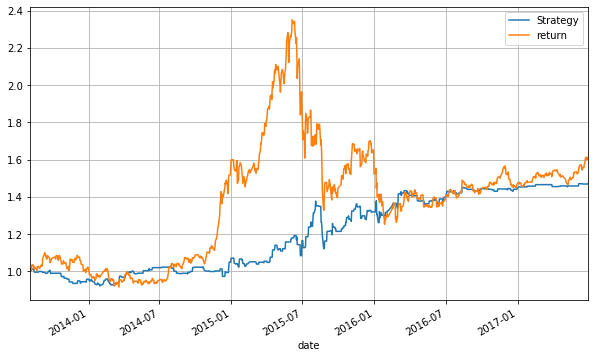

In [28]:
df2[['Strategy','return']].dropna().plot(grid=True,figsize=(10,6))

## 训练集数据

In [38]:
predict_train=clf.predict(features_train)

In [39]:
df_train=pd.DataFrame(labels_train)
df_train['predict']=predict_train
df_train=df_train.rename(columns={'close': 'Next Close', 'predict':'Predict Next Close'})
df_train.head()

,Next Close,Predict Next Close
date,,
2005-05-13,875.27,892.599060
2005-05-16,881.46,862.156310
2005-05-17,883.20,866.657926
2005-05-18,884.17,877.451854
2005-05-19,882.76,884.647471


In [40]:
current_close_train=hs_20d['close'].iloc[:2000]
current_close_train.head()

date
2005-05-13    887.54
2005-05-16    875.27
2005-05-17    881.46
2005-05-18    883.20
2005-05-19    884.17
Name: close, dtype: float64

In [41]:
neaxt_open_train=data['open'].iloc[20:2020].shift(-1)
neaxt_open_train.head()

date
2005-05-13    885.39
2005-05-16    873.08
2005-05-17    881.14
2005-05-18    882.84
2005-05-19    883.51
Name: open, dtype: float64

In [44]:
df1_train=pd.merge(df_train,current_close_train,left_index=True, right_index=True)
df2_train=pd.merge(df1_train,neaxt_open_train,left_index=True, right_index=True)
df2_train.columns = ['Next Close', 'Predicted Next Close', 'Current Close', 'Next Open']
df2_train.head()

,Next Close,Predicted Next Close,Current Close,Next Open
date,,,,
2005-05-13,875.27,892.599060,887.54,885.39
2005-05-16,881.46,862.156310,875.27,873.08
2005-05-17,883.20,866.657926,881.46,881.14
2005-05-18,884.17,877.451854,883.20,882.84
2005-05-19,882.76,884.647471,884.17,883.51


In [47]:
df2_train['Signal']=np.where(df2_train['Predicted Next Close']>df2_train['Next Open']+5,1,0)
df2_train['PL']=np.where(df2_train['Signal']==1,(df2_train['Next Close']-df2_train['Next Open'])/df2_train['Next Open'],0)

In [48]:
df2_train.head()

,Next Close,Predicted Next Close,Current Close,Next Open,Signal,PL
date,,,,,,
2005-05-13,875.27,892.599060,887.54,885.39,1,-0.01143
2005-05-16,881.46,862.156310,875.27,873.08,0,0.00000
2005-05-17,883.20,866.657926,881.46,881.14,0,0.00000
2005-05-18,884.17,877.451854,883.20,882.84,0,0.00000
2005-05-19,882.76,884.647471,884.17,883.51,0,0.00000


In [49]:
df2_train['Strategy'] = (df2_train['PL'].shift(1)+1).cumprod()
df2_train['return'] = (df2_train['Next Close'].pct_change()+1).cumprod()

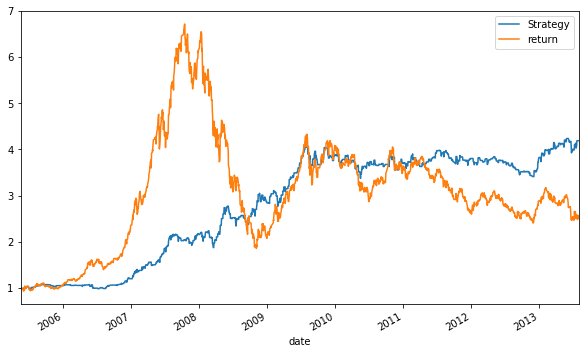

In [50]:
df2_train[['Strategy','return']].dropna().plot(figsize=(10, 6))